**Імпортуємо неохідні модулі та функції**

In [3]:
import pandas as pd
from traceback import print_exc
from random import uniform
from time import perf_counter

**Функція для трансформації даних, які будуть прочитані з csv файлу.**

Ознака для варіанту №1 - **Overall scores**. Дані в цьому стовпчику наявні в наступних форматах:

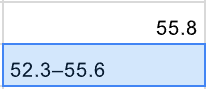

Через це, наступна функція спочатку намагається перетворити клітинку на число.

Якщо в неї це не виходить, вона перевіряє чи наявний дефіс, якщо так, то вона повертає середнє значення чисел, які розділені ним, інакше (даних які б потрапили в else в цьому файлі нема, але для повноти програми додав цю умову) повертаємо значення клітинки і згодом (в наступній функції) її значення буде замінене на середнє всіх числових значень отриманих після цього перетворення.

In [4]:
def transform_scores(score: str):
    try:
        # If data is a number we return the number
        return float(score)
    except ValueError:
        if '–' in score:
            # Some data is in format n–m so we put in that cell an average of n and m
            lower_score, upper_score = map(float, score.split('–'))

            return lower_score + upper_score / 2
        else:
            # If data cannot be transformed to number just return it
            return score

**Функція для отримання даних, які будуть опрацьовані.**

Її алгоритм:


1.   Прочитати csv файл;
2.   Дістати з прочитаних даних, стовпчик з назвою 'Overall scores' у вигляді Pandas Series рядків (str), дл ятого аби врахувати, що в нас є значення формату n-m;
3.   Застосувати перетворення описане вище;
4.   Дістати всі числові значення, не числові замінити на NaN;
5.   Для числових даних обчислити середнє значення та замінити всі NaN на це значення.   



In [5]:
def get_overall_scores_data(file_path: str) -> pd.Series:
    universities_df = pd.read_csv(file_path)

    # As we need only one column, we use Pandas Series
    overall_scores_column = universities_df['Overall scores'].astype(str)

    # Transform values to numbers if possible
    overall_scores = overall_scores_column.apply(transform_scores)

    # Convert values to numeric, coerce non-numeric values to NaN
    overall_scores = pd.to_numeric(overall_scores, errors='coerce')

    # Drop NaN values
    numeric_values = overall_scores.dropna()

    # Calculate mean of numeric values
    mean = numeric_values.mean()

    # Fill NaN values with mean
    overall_scores.fillna(value=mean, inplace=True)

    return overall_scores

**Функція для реалізації Методу дробного інтервалу СВ.**

Випадкове число α ∈ \(1, a) згенероване з використанням `random.uniform`.

In [6]:
def fractional_interval_method(data: pd.Series, n: int):
    N = len(data)

    a = N / n

    alpha = uniform(1.0, a)

    sample = [data[int(alpha + i * a)] for i in range(n)]

    return sample

**Тіло основної функції програми.**

Алгоритм:

1.   Зчитуємо дані з файлу, задаємо числові дані варіанту;
2.   Створюємо вибірки використовуючи метод зображений вище, для першого виклику функції, обраховуємо час виконання методу в секундах;
3.   Обраховуємо середнє значення генеральної сукупності, середні значення для кожної з вибірок, міжгрупове стандартне відхилення;
4.   Виводимо отримані значення в консоль.

Можемо бачити, що середні значення для вибірок досить близькі до середнього значення генеральної сукупності

In [7]:
if __name__ == '__main__':
    try:
        overall_scores = get_overall_scores_data('./data/universities_data.csv')

        m = 10

        n = 5

        sample_len = max(1, int(len(overall_scores) * n / 100))

        samples = []

        method_work_time = 0

        for i in range(m):
            if i:
                sample = fractional_interval_method(overall_scores, sample_len)
            else:
                # Calculate method work time
                start_time = perf_counter()

                sample = fractional_interval_method(overall_scores, sample_len)

                end_time = perf_counter()

                method_work_time = end_time - start_time

            samples.append(pd.Series(sample))

        general_mean = overall_scores.mean()

        sample_means = [sample.mean() for sample in samples]

        samples_std = pd.concat(samples).std()

        print(f'Execution time: {method_work_time}')
        print(f'General mean: {general_mean}')
        print(f'Sample means: {sample_means}')
        print(f'Samples std: {samples_std}')
    except Exception as e:
        print('Error occurred:')
        print_exc()

Execution time: 0.0001966430004358699
General mean: 52.00516483516485
Sample means: [52.42111111111113, 51.83555555555557, 52.65222222222224, 52.35666666666669, 52.21666666666669, 50.9277777777778, 52.38777777777779, 51.692222222222235, 52.58333333333336, 52.011111111111134]
Samples std: 16.117340321678103
